In [1]:
import sys
import random
import glob
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
import torch
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader, Dataset
from torchvision import models, transforms
from torchvision.models import ResNeXt50_32X4D_Weights

In [2]:

def validate_video(vid_path,train_transforms):
      transform = train_transforms
      count = 20
      video_path = vid_path
      frames = []
      a = int(100/count)
      first_frame = np.random.randint(0,a)
      temp_video = video_path.split('/')[-1]
      for i,frame in enumerate(frame_extract(video_path)):
        frames.append(transform(frame))
        if(len(frames) == count):
          break
      frames = torch.stack(frames)
      frames = frames[:count]
      return frames

In [3]:
#extract a from from video
def frame_extract(path):
  vidObj = cv2.VideoCapture(path)
  success = 1
  while success:
      success, image = vidObj.read()
      if success:
          yield image

im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

In [4]:
train_transforms = transforms.Compose([
  transforms.ToPILImage(),
  transforms.Resize((im_size,im_size)),
  transforms.ToTensor(),
  transforms.Normalize(mean,std)])
video_fil =  glob.glob('C:/Users/alapa/Documents/Deepfake_detection_using_deep_learning-master/Deepfake_detection_using_deep_learning-master/Celeb-DF/Celeb-real/*.mp4')
#video_fil += glob.glob('C:/Users/alapa/Documents/Deepfake_detection_using_deep_learning-master/Deepfake_detection_using_deep_learning-master/Celeb-DF/YouTube-real/*.mp4')
#video_fil += glob.glob('C:/Users/alapa/Documents/Deepfake_detection_using_deep_learning-master/Deepfake_detection_using_deep_learning-master/Celeb-DF/Celeb-synthesis/*.mp4')

print("Total no of videos :" , len(video_fil))
print(video_fil)
count = 0;
for i in video_fil:
  try:
    count+=1
    validate_video(i,train_transforms)
  except:
    print("Number of video processed: " , count ," Remaining : " , (len(video_fil) - count))
    print("Corrupted video is : " , i)
    continue
print((len(video_fil) - count))

Total no of videos : 158
['C:/Users/alapa/Documents/Deepfake_detection_using_deep_learning-master/Deepfake_detection_using_deep_learning-master/Celeb-DF/Celeb-real\\id0_0000.mp4', 'C:/Users/alapa/Documents/Deepfake_detection_using_deep_learning-master/Deepfake_detection_using_deep_learning-master/Celeb-DF/Celeb-real\\id0_0001.mp4', 'C:/Users/alapa/Documents/Deepfake_detection_using_deep_learning-master/Deepfake_detection_using_deep_learning-master/Celeb-DF/Celeb-real\\id0_0002.mp4', 'C:/Users/alapa/Documents/Deepfake_detection_using_deep_learning-master/Deepfake_detection_using_deep_learning-master/Celeb-DF/Celeb-real\\id0_0003.mp4', 'C:/Users/alapa/Documents/Deepfake_detection_using_deep_learning-master/Deepfake_detection_using_deep_learning-master/Celeb-DF/Celeb-real\\id0_0004.mp4', 'C:/Users/alapa/Documents/Deepfake_detection_using_deep_learning-master/Deepfake_detection_using_deep_learning-master/Celeb-DF/Celeb-real\\id0_0005.mp4', 'C:/Users/alapa/Documents/Deepfake_detection_using

In [5]:
video_files =  glob.glob('C:/Users/alapa/Documents/Deepfake_detection_using_deep_learning-master/Deepfake_detection_using_deep_learning-master/Celeb-DF/Celeb-real/*.mp4')
#video_files += glob.glob('C:/Users/alapa/Documents/Deepfake_detection_using_deep_learning-master/Deepfake_detection_using_deep_learning-master/Celeb-DF/YouTube-real/*.mp4')
#video_files += glob.glob('C:/Users/alapa/Documents/Deepfake_detection_using_deep_learning-master/Deepfake_detection_using_deep_learning-master/Celeb-DF/Celeb-synthesis/*.mp4')

random.shuffle(video_files)
random.shuffle(video_files)
random.shuffle(video_files)

frame_count = []
for video_file in video_files:
  cap = cv2.VideoCapture(video_file)
  if(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))<100):
    video_files.remove(video_file)
    continue
  frame_count.append(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))
print("frames are " , frame_count)
print("Total no of video: " , len(frame_count))
print('Average frame per video:',np.mean(frame_count))

frames are  [459, 401, 566, 362, 409, 145, 284, 557, 499, 372, 307, 352, 466, 303, 295, 439, 172, 380, 376, 328, 448, 349, 381, 446, 337, 303, 611, 477, 412, 326, 350, 410, 308, 304, 401, 305, 215, 479, 409, 458, 314, 514, 364, 306, 380, 322, 315, 247, 535, 291, 510, 415, 371, 378, 161, 505, 387, 445, 458, 467, 313, 309, 400, 322, 239, 530, 400, 327, 428, 379, 361, 461, 464, 458, 357, 517, 390, 311, 459, 477, 483, 317, 425, 441, 269, 435, 272, 350, 330, 740, 323, 325, 534, 332, 420, 340, 345, 361, 516, 570, 492, 459, 318, 376, 525, 224, 444, 298, 316, 327, 458, 280, 339, 489, 214, 497, 456, 314, 333, 398, 294, 502, 383, 457, 555, 308, 315, 371, 491, 270, 451, 334, 326, 316, 373, 372, 363, 274, 437, 372, 529, 422, 398, 519, 320, 470, 452, 469, 630, 459, 380, 312, 201, 397, 276, 351, 364, 520]
Total no of video:  158
Average frame per video: 389.27848101265823


In [6]:
class video_dataset(Dataset):
    def __init__(self,video_names,labels,sequence_length = 60,transform = None):
        self.video_names = video_names
        self.labels = labels
        self.transform = transform
        self.count = sequence_length
    def __len__(self):
        return len(self.video_names)
    def __getitem__(self,idx):
        video_path = self.video_names[idx]
        frames = []
        a = int(100/self.count)
        first_frame = np.random.randint(0,a)
        temp_video = video_path.split('\\')[-1]
        #print(temp_video)
        label = self.labels.iloc[(labels.loc[labels["file"] == temp_video].index.values[0]),1]
        if(label == 'FAKE'):
          label = 0
        if(label == 'REAL'):
          label = 1
        for i,frame in enumerate(self.frame_extract(video_path)):
          frames.append(self.transform(frame))
          if(len(frames) == self.count):
            break
        frames = torch.stack(frames)
        frames = frames[:self.count]
        #print("length:" , len(frames), "label",label)
        return frames,label
    def frame_extract(self,path):
      vidObj = cv2.VideoCapture(path)
      success = 1
      while success:
          success, image = vidObj.read()
          if success:
              yield image

In [7]:

#plot the image
def im_plot(tensor):
    image = tensor.cpu().numpy().transpose(1,2,0)
    b,g,r = cv2.split(image)
    image = cv2.merge((r,g,b))
    image = image*[0.22803, 0.22145, 0.216989] +  [0.43216, 0.394666, 0.37645]
    image = image*255.0
    plt.imshow(image.astype(int))
    plt.show()



In [8]:
import pandas as pd
#count the number of fake and real videos

header_list = ["file","label"]
labels = pd.read_csv('C:/Users/alapa/Documents/Deepfake_detection_using_deep_learning-master/Deepfake_detection_using_deep_learning-master/abhijit/Model Creation/labels/small/Celeb-real.csv',names=header_list)

def number_of_real_and_fake_videos(data_list):
  header_list = ["file","label"]
  lab = pd.read_csv('C:/Users/alapa/Documents/Deepfake_detection_using_deep_learning-master/Deepfake_detection_using_deep_learning-master/abhijit/Model Creation/labels/small/Celeb-real.csv',names=header_list)
  fake = 0
  real = 0
  for i in data_list:
    temp_video = i.split('\\')[-1]
    label = lab.iloc[(labels.loc[labels["file"] == temp_video].index.values[0]),1]
    if(label == 'FAKE'):
      fake+=1
    if(label == 'REAL'):
      real+=1
  return real,fake

In [9]:
video_files

['C:/Users/alapa/Documents/Deepfake_detection_using_deep_learning-master/Deepfake_detection_using_deep_learning-master/Celeb-DF/Celeb-real\\id0_0005.mp4',
 'C:/Users/alapa/Documents/Deepfake_detection_using_deep_learning-master/Deepfake_detection_using_deep_learning-master/Celeb-DF/Celeb-real\\id8_0003.mp4',
 'C:/Users/alapa/Documents/Deepfake_detection_using_deep_learning-master/Deepfake_detection_using_deep_learning-master/Celeb-DF/Celeb-real\\id8_0004.mp4',
 'C:/Users/alapa/Documents/Deepfake_detection_using_deep_learning-master/Deepfake_detection_using_deep_learning-master/Celeb-DF/Celeb-real\\id9_0004.mp4',
 'C:/Users/alapa/Documents/Deepfake_detection_using_deep_learning-master/Deepfake_detection_using_deep_learning-master/Celeb-DF/Celeb-real\\id1_0004.mp4',
 'C:/Users/alapa/Documents/Deepfake_detection_using_deep_learning-master/Deepfake_detection_using_deep_learning-master/Celeb-DF/Celeb-real\\id10_0001.mp4',
 'C:/Users/alapa/Documents/Deepfake_detection_using_deep_learning-mas

In [10]:

# load the labels and video in data loader


#print(labels)
train_videos = video_files[:int(0.8*len(video_files))]
valid_videos = video_files[int(0.8*len(video_files)):]
print("train : " , len(train_videos))
print("test : " , len(valid_videos))
# train_videos,valid_videos = train_test_split(data,test_size = 0.2)
# print(train_videos)

print("TRAIN: ", "Real:",number_of_real_and_fake_videos(train_videos)[0]," Fake:",number_of_real_and_fake_videos(train_videos)[1])
print("TEST: ", "Real:",number_of_real_and_fake_videos(valid_videos)[0]," Fake:",number_of_real_and_fake_videos(valid_videos)[1])



train :  126
test :  32
TRAIN:  Real: 126  Fake: 0
TEST:  Real: 32  Fake: 0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-21..261].


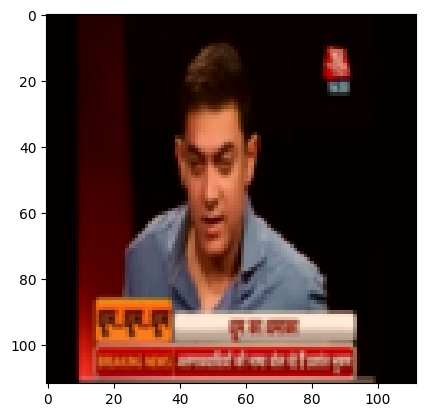

In [11]:
train_transforms = transforms.Compose([
  transforms.ToPILImage(),
  transforms.Resize((im_size,im_size)),
  transforms.ToTensor(),
  transforms.Normalize(mean,std)])

test_transforms = transforms.Compose([
  transforms.ToPILImage(),
  transforms.Resize((im_size,im_size)),
  transforms.ToTensor(),
  transforms.Normalize(mean,std)])
train_data = video_dataset(train_videos,labels,sequence_length = 10,transform = train_transforms)
#print(train_data)
val_data = video_dataset(valid_videos,labels,sequence_length = 10,transform = train_transforms)
train_loader = DataLoader(train_data,batch_size = 4,shuffle = True,num_workers = 4)
valid_loader = DataLoader(val_data,batch_size = 4,shuffle = True,num_workers = 4)
image,label = train_data[0]
im_plot(image[0,:,:,:])

In [12]:
#Model with feature visualization

class Model(nn.Module):
    def __init__(self, num_classes,latent_dim= 2048, lstm_layers=1 , hidden_dim = 2048, bidirectional = False):
        super(Model, self).__init__()
        model = models.resnext50_32x4d(weights=ResNeXt50_32X4D_Weights.IMAGENET1K_V1) #Residual Network CNN
        self.model = nn.Sequential(*list(model.children())[:-2])
        self.lstm = nn.LSTM(latent_dim,hidden_dim, lstm_layers,  bidirectional)
        self.relu = nn.LeakyReLU()
        self.dp = nn.Dropout(0.4)
        self.linear1 = nn.Linear(2048,num_classes)
        self.avgpool = nn.AdaptiveAvgPool2d(1)
    def forward(self, x):
        batch_size,seq_length, c, h, w = x.shape
        x = x.view(batch_size * seq_length, c, h, w)
        fmap = self.model(x)
        x = self.avgpool(fmap)
        x = x.view(batch_size,seq_length,2048)
        x_lstm,_ = self.lstm(x,None)
        return fmap,self.dp(self.linear1(torch.mean(x_lstm,dim = 1)))



In [13]:
model = Model(2).cuda()
a,b = model(torch.from_numpy(np.empty((1,20,3,112,112))).type(torch.cuda.FloatTensor))

In [14]:
def train_epoch(epoch, num_epochs, data_loader, model, criterion, optimizer):
    print(' 1.1')
    model.train()
    print(' 1.2')
    losses = AverageMeter()
    print(' 1.3')
    accuracies = AverageMeter()
    print(' 1.4')
    t = []
    print(' 1.5 loop')
    for i, (inputs, targets) in enumerate(data_loader):
        print('     1.5.1')
        if torch.cuda.is_available():
            print('     1.5.1.1')
            targets = targets.cuda().type(torch.cuda.LongTensor)
            print('     1.5.1.2')
            inputs = inputs.cuda()
        print('     1.5.2')
        _,outputs = model(inputs)
        print('     1.5.3')
        loss  = criterion(outputs,targets.type(torch.cuda.LongTensor))
        print('     1.5.4')
        acc = calculate_accuracy(outputs, targets.type(torch.cuda.LongTensor))
        print('     1.5.5')
        losses.update(loss.item(), inputs.size(0))
        print('     1.5.6')
        accuracies.update(acc, inputs.size(0))
        print('     1.5.7')
        optimizer.zero_grad()
        print('     1.5.8')
        loss.backward()
        print('     1.5.9')
        optimizer.step()
        print('     1.5.10')
        sys.stdout.write(
                print('     1.5.10.1'),
                "\r[Epoch %d/%d] [Batch %d / %d] [Loss: %f, Acc: %.2f%%]"
                % (
                    epoch,
                    num_epochs,
                    i,
                    len(data_loader),
                    losses.avg,
                    accuracies.avg))
        print('     1.5.10.2')
    torch.save(model.state_dict(),'C:/Users/alapa/Documents/Deepfake_detection_using_deep_learning-master/Deepfake_detection_using_deep_learning-master/model_checkpoints/checkpoint.pt')
    print('     1.5.11')
    return losses.avg,accuracies.avg

In [15]:
def test(epoch,model, data_loader ,criterion):
    print('Testing')
    model.eval()
    losses = AverageMeter()
    accuracies = AverageMeter()
    pred = []
    true = []
    count = 0
    with torch.no_grad():
        for i, (inputs, targets) in enumerate(data_loader):
            if torch.cuda.is_available():
                targets = targets.cuda().type(torch.cuda.FloatTensor)
                inputs = inputs.cuda()
            _,outputs = model(inputs)
            loss = torch.mean(criterion(outputs, targets.type(torch.cuda.LongTensor)))
            acc = calculate_accuracy(outputs,targets.type(torch.cuda.LongTensor))
            _,p = torch.max(outputs,1)
            true += (targets.type(torch.cuda.LongTensor)).detach().cpu().numpy().reshape(len(targets)).tolist()
            pred += p.detach().cpu().numpy().reshape(len(p)).tolist()
            losses.update(loss.item(), inputs.size(0))
            accuracies.update(acc, inputs.size(0))
            sys.stdout.write(
                    "\r[Batch %d / %d]  [Loss: %f, Acc: %.2f%%]"
                    % (
                        i,
                        len(data_loader),
                        losses.avg,
                        accuracies.avg
                        )
                    )
        print('\nAccuracy {}'.format(accuracies.avg))
    return true,pred,losses.avg,accuracies.avg

In [16]:
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()
    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

In [17]:
def calculate_accuracy(outputs, targets):
    batch_size = targets.size(0)

    _, pred = outputs.topk(1, 1, True)
    pred = pred.t()
    correct = pred.eq(targets.view(1, -1))
    n_correct_elems = correct.float().sum().item()
    return 100* n_correct_elems / batch_size

In [18]:

#Output confusion matrix
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[1][1])
    print('\n')
    df_cm = pd.DataFrame(cm, range(2), range(2))
    sn.set(font_scale=1.4) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
    plt.ylabel('Actual label', size = 20)
    plt.xlabel('Predicted label', size = 20)
    plt.xticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.yticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.ylim([2, 0])
    plt.show()
    calculated_acc = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+ cm[1][1])
    print("Calculated Accuracy",calculated_acc*100)

In [19]:
def plot_loss(train_loss_avg,test_loss_avg,num_epochs):
  loss_train = train_loss_avg
  loss_val = test_loss_avg
  print(num_epochs)
  epochs = range(1,num_epochs+1)
  plt.plot(epochs, loss_train, 'g', label='Training loss')
  plt.plot(epochs, loss_val, 'b', label='validation loss')
  plt.title('Training and Validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [20]:

def plot_accuracy(train_accuracy,test_accuracy,num_epochs):
  loss_train = train_accuracy
  loss_val = test_accuracy
  epochs = range(1,num_epochs+1)
  plt.plot(epochs, loss_train, 'g', label='Training accuracy')
  plt.plot(epochs, loss_val, 'b', label='validation accuracy')
  plt.title('Training and Validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

In [21]:
lr = 1e-5#0.001
num_epochs = 1
optimizer = torch.optim.Adam(model.parameters(), lr= lr,weight_decay = 1e-5)
criterion = nn.CrossEntropyLoss().cuda()
train_loss_avg =[]
train_accuracy = []
test_loss_avg = []
test_accuracy = []

In [22]:
for epoch in range(1 , num_epochs+1):
    print('1')
    l, acc = train_epoch(epoch,num_epochs,train_loader,model,criterion,optimizer)
    print('2')
    train_loss_avg.append(l)
    print('3')
    train_accuracy.append(acc)
    print('4')
    true,pred,tl,t_acc = test(epoch,model,valid_loader,criterion)
    print('5')
    test_loss_avg.append(tl)
    print('6')
    test_accuracy.append(t_acc)
    print('7')

1
 1.1
 1.2
 1.3
 1.4
 1.5 loop


RuntimeError: DataLoader worker (pid(s) 14980, 5168, 16368, 19056) exited unexpectedly

In [ ]:
plot_loss(train_loss_avg,test_loss_avg,len(train_loss_avg))
plot_accuracy(train_accuracy,test_accuracy,len(train_accuracy))
print(confusion_matrix(true,pred))
print_confusion_matrix(true,pred)

In [ ]:
import torch

# Check if CUDA is available
if torch.cuda.is_available():
    print(f"CUDA is available. Number of GPUs: {torch.cuda.device_count()}")
    print(f"Current GPU: {torch.cuda.current_device()} - {torch.cuda.get_device_name(0)}")
else:
    print("CUDA is not available.")